# FeatureWiz on High Dimensional Data
please look at the source of data below and download it from there. Due to intellectual property restrictions, we can't provide you the data.

The AlonDS data set was collected by Alon et. al. and consists of 2000 genes measured on 62 patients: 40 diagnosed with colon cancer and 22 healthy patients. The patient status is described by the factor ‘grouping’ and the gene values are given by the numeric variables ‘genes.1’ through ‘genes.2000’<br>
Link:<br>
https://rdrr.io/cran/HiDimDA/man/AlonDS.html
<br>Source:
Alon, U., Barkai, N., Notterman, D.A., Gish, K., Ybarra, S., Mack, D. and Levine, A.J. (1999) “Broad patterns of gene expression revealed by clustering analysis of tumor and normal colon tissues probed by oligonucleotide arrays”, In: Proceedings National Academy of Sciences USA 96, 6745-6750. The data set is available at http://microarray.princeton.edu/oncology <br>
The direct link to the dataset is here:<br>
http://genomics-pubs.princeton.edu/oncology/affydata/index.html

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('AlonDS2000.csv')
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)
target = 'grouping'
preds = [x for x in list(df) if x not in [target,'ID']]
print(df.shape)
df.head()

(62, 2002)


,ID,grouping,genes.1,genes.2,genes.3,genes.4,genes.5,genes.6,genes.7,genes.8,...,genes.1991,genes.1992,genes.1993,genes.1994,genes.1995,genes.1996,genes.1997,genes.1998,genes.1999,genes.2000
0,Obs1,colonc,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,...,99.110714,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125
1,Obs2,healthy,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375
2,Obs3,colonc,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
3,Obs4,healthy,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,...,152.595240,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500
4,Obs5,colonc,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250


### Let us first transform the predictors using a Logarithmic transformation and then apply FeatureWiz

In [5]:
df[preds] = np.log10(df[preds])
df.head()

,ID,grouping,genes.1,genes.2,genes.3,genes.4,genes.5,genes.6,genes.7,genes.8,...,genes.1991,genes.1992,genes.1993,genes.1994,genes.1995,genes.1996,genes.1997,genes.1998,genes.1999,genes.2000
0,Obs1,colonc,3.933964,3.737848,3.629757,3.609054,3.300572,3.722825,3.336404,3.443016,...,1.996121,1.829698,2.414827,2.142698,1.945629,1.598439,1.831414,1.878967,1.921803,1.457901
1,Obs2,healthy,3.962097,3.827339,3.688727,3.570328,3.304323,3.745848,3.585355,3.446131,...,2.103083,1.964913,1.983519,2.177796,1.915070,1.929589,2.182400,2.270836,1.648092,1.224630
2,Obs3,colonc,3.582711,3.843255,3.729972,3.672620,3.066905,3.196499,3.122348,3.167984,...,2.181493,1.917584,1.492795,2.287623,1.886336,2.351449,1.494502,1.629983,1.206624,1.180592
3,Obs4,healthy,3.795633,3.893403,3.774943,3.599399,3.301597,3.328490,3.185016,3.234171,...,2.183541,1.619967,0.772688,2.262466,1.872324,1.830657,1.684295,1.628593,1.698818,1.206421
4,Obs5,colonc,3.509247,3.567550,3.531573,3.539526,3.338739,3.465796,3.315812,3.469612,...,2.101968,1.884250,2.207769,1.790294,1.736904,2.349004,1.863910,1.760413,0.874409,1.502598


In [6]:
from featurewiz import featurewiz

Imported featurewiz version: 0.0.6. Call using:
                 features = featurewiz(dataname, target, corr_limit=0.70,
                                verbose=2)


Number of GPUs = 2
    No GPU active on this device
    Running XGBoost using CPU parameters
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2001 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
################ Single_Label Binary_Classification Feature Selection Started #####################
Searching for highly correlated variables from 2000 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time...) ############
    Removing (1773) highly correlated variables:


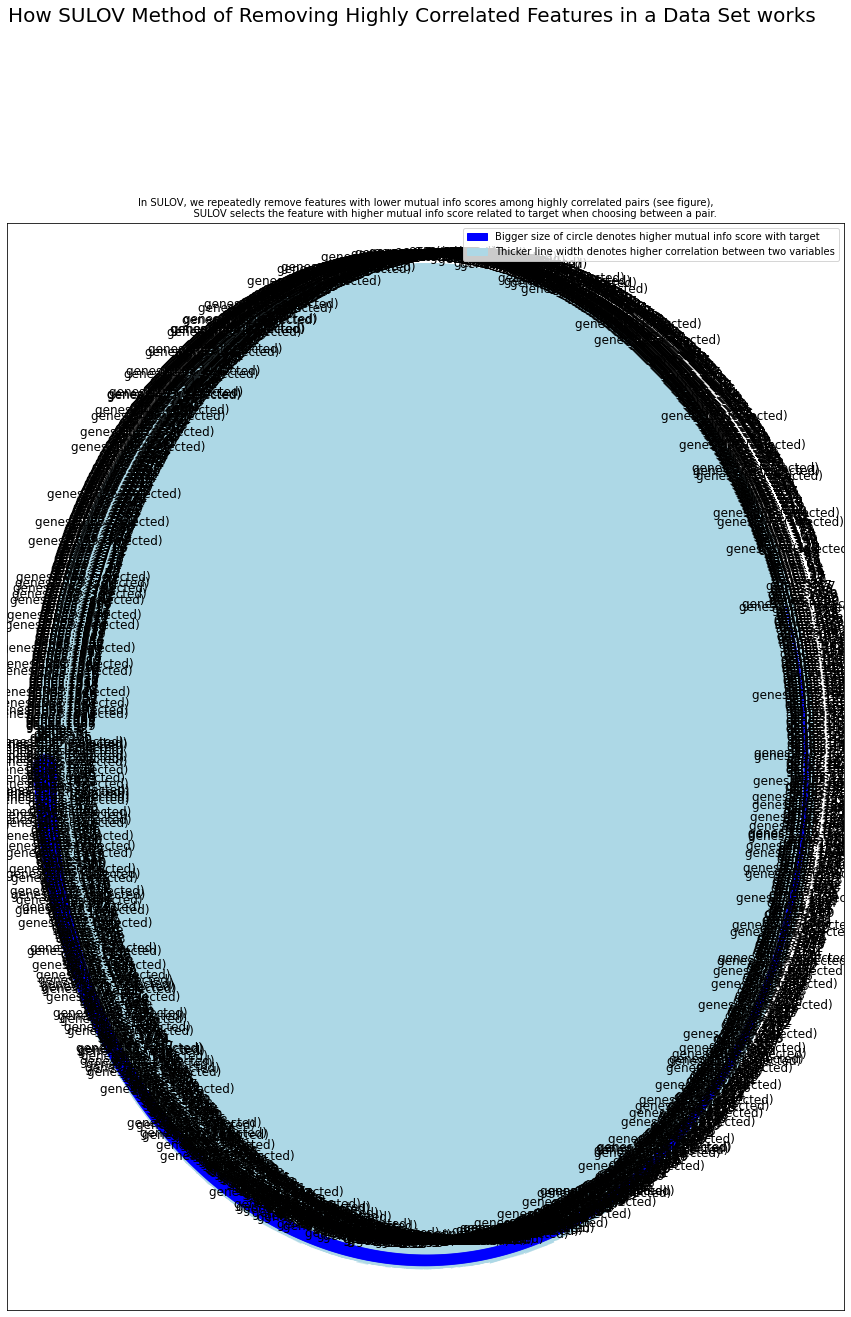

    Adding 0 categorical variables to reduced numeric variables  of 227
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 227 
    Finding Important Features using Boosted Trees algorithm...
        using 227 variables...
        using 182 variables...
        using 137 variables...
        using 92 variables...
        using 47 variables...
        using 2 variables...
Found 105 important features
    Time taken (in seconds) = 160


In [7]:
feats = featurewiz(df, target)

## Compare the number of variables selected by the "High Criticism" method vs FeatureWiz On the available Alon's Colon Cancer Data set after a logarithmic transformation. 

In [11]:
### HiDimDA using High Criticism method selected 46 genes as being important for this data set
HC_sel = ['genes.25', 'genes.42', 'genes.65', 'genes.74', 'genes.137', 'genes.186', 'genes.240',
          'genes.244', 'genes.248', 'genes.266', 'genes.364', 'genes.376', 'genes.390',
          'genes.398', 'genes.492', 'genes.512', 'genes.580', 'genes.624', 'genes.764',
          'genes.779', 'genes.801', 'genes.821', 'genes.896', 'genes.963', 'genes.991', 
          'genes.1001', 'genes.1041', 'genes.1059', 'genes.1152', 'genes.1324', 'genes.1345',
          'genes.1405', 'genes.1422', 'genes.1472', 'genes.1493', 'genes.1581', 'genes.1633',
          'genes.1634', 'genes.1647', 'genes.1670', 'genes.1729', 'genes.1769', 'genes.1770',
          'genes.1771', 'genes.1842', 'genes.1899']
len(HC_sel)

46

In [12]:
### However, featurewiz found 105 genes as being important for this data set
len(feats)

105

# Let's compare the features generated by the 2 methods to see which one works best for FeatureSelection in predicting target

In [14]:
from sklearn.ensemble import RandomForestClassifier

## High Criticism Method generates a Cross Validated Mean Accuracy of 77% using 46 selected features

In [18]:
from sklearn.model_selection import cross_val_score
X = df[HC_sel]
y = df[target]
RFC = RandomForestClassifier(n_estimators=200, random_state=99)
scoresHC = cross_val_score(RFC, X, y, scoring="accuracy", cv=3, n_jobs=-1)
print(scoresHC)
print('Average Accuracy: %0.0f%%' %(100*np.mean(scoresHC)))

[0.9047619  0.80952381 0.6       ]
Average Accuracy: 77%


## FeatureWiz Method generates a Cross Validated Mean Accuracy of 88% using 105 selected features

In [19]:
RFC = RandomForestClassifier(n_estimators=200, random_state=99)
X = df[feats]
y = df[target]
scoresFW = cross_val_score(RFC, X, y, scoring="accuracy", cv=3, n_jobs=-1)
print(scoresFW)
print('Average Accuracy: %0.0f%%' %(100*np.mean(scoresFW)))

[1.        0.9047619 0.75     ]
Average Accuracy: 88%
